# Author Information

**Author:** Savinda Rangika De Abrew  
**Email:** deabrew@gmail.com  
**Date:** June 24, 2024  
**Affiliation:** University of Hertfordshire

---

**Description:**  
This notebook demonstrates the implementation of a Convolutional Neural Network (CNN) for Brain Tumor Classification

# Importing Libraries:

In [ ]:
# Import libraiers for Data Processing
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Import libraiers for  data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraiers for For Deep learing Models

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


# miscellaneous
from tqdm import tqdm
import os
import random

# Load The Driver #

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip the file in to Brain_Tumor Folder #


In [ ]:
#with zipfile.ZipFile("/content/drive/MyDrive/archive.zip","r") as zip_ref:
 #zip_ref.extractall("/content/drive/MyDrive/Brain_Tumor")

#Data Loading Both Traing and Test images#

In [ ]:
# Generate data paths with labels


train_dir = '/content/drive/MyDrive/Brain_Tumor/Training/'
#test_dir = '/content/drive/MyDrive/Brain_Tumor/Testing/'


train_filepaths = []
train_labels = []

# Get folders names
folds = os.listdir(train_dir)

for trfold in folds:
    trfoldpath = os.path.join(train_dir, trfold)
    filelist = os.listdir(trfoldpath)
    for file in filelist:
        trfpath = os.path.join(trfoldpath, file)

        train_filepaths.append(trfpath)
        train_labels.append(trfold)

# Concatenate data paths with labels into one dataframe
train_filepaths_series = pd.Series(train_filepaths, name= 'filepaths')
train_labels_series = pd.Series(train_labels, name='labels')

train_df = pd.concat([train_filepaths_series, train_labels_series], axis= 1)

In [ ]:
train_df

,filepaths,labels
0,/content/drive/MyDrive/Brain_Tumor/Training/pi...,pituitary
1,/content/drive/MyDrive/Brain_Tumor/Training/pi...,pituitary
2,/content/drive/MyDrive/Brain_Tumor/Training/pi...,pituitary
3,/content/drive/MyDrive/Brain_Tumor/Training/pi...,pituitary
4,/content/drive/MyDrive/Brain_Tumor/Training/pi...,pituitary
...,...,...
5707,/content/drive/MyDrive/Brain_Tumor/Training/no...,notumor
5708,/content/drive/MyDrive/Brain_Tumor/Training/no...,notumor
5709,/content/drive/MyDrive/Brain_Tumor/Training/no...,notumor
5710,/content/drive/MyDrive/Brain_Tumor/Training/no...,notumor


In [ ]:
#train_dir = '/content/drive/MyDrive/Brain_Tumor/Training/'
test_dir = '/content/drive/MyDrive/Brain_Tumor/Testing/'


test_filepaths = []
test_labels = []

# Get folders names
folds = os.listdir(test_dir)

for tsfold in folds:
    tsfoldpath = os.path.join(test_dir, tsfold)
    filelist = os.listdir(tsfoldpath)
    for file in filelist:
        tsfpath = os.path.join(tsfoldpath, file)

        test_filepaths.append(tsfpath)
        test_labels.append(tsfold)

# Concatenate data paths with labels into one dataframe
test_filepaths_series = pd.Series(test_filepaths, name= 'filepaths')
test_labels_series = pd.Series(test_labels, name='labels')

test_df = pd.concat([test_filepaths_series, test_labels_series], axis= 1)

In [ ]:
test_df

,filepaths,labels
0,/content/drive/MyDrive/Brain_Tumor/Testing/gli...,glioma
1,/content/drive/MyDrive/Brain_Tumor/Testing/gli...,glioma
2,/content/drive/MyDrive/Brain_Tumor/Testing/gli...,glioma
3,/content/drive/MyDrive/Brain_Tumor/Testing/gli...,glioma
4,/content/drive/MyDrive/Brain_Tumor/Testing/gli...,glioma
...,...,...
1306,/content/drive/MyDrive/Brain_Tumor/Testing/pit...,pituitary
1307,/content/drive/MyDrive/Brain_Tumor/Testing/pit...,pituitary
1308,/content/drive/MyDrive/Brain_Tumor/Testing/pit...,pituitary
1309,/content/drive/MyDrive/Brain_Tumor/Testing/pit...,pituitary


Text(0.5, 1.0, 'Train and Test split distribution')

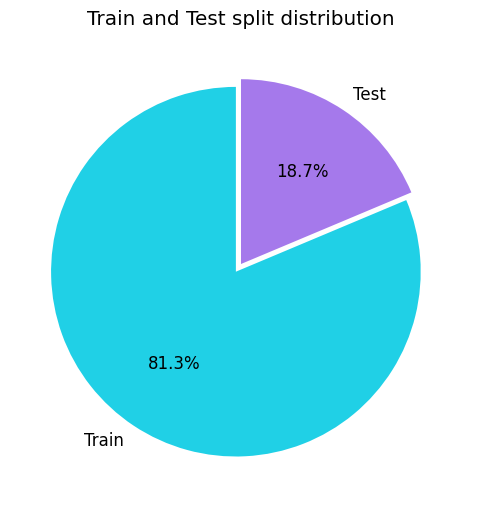

In [ ]:
# Ploting the Train and Test split distribution

plt.figure(figsize=(12,6))
colors = ["#20D0E6","#A579EB"]


plt.rcParams.update({'font.size': 12})
plt.pie([len(train_df.labels), len(test_df.labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=90);

plt.title('Train and Test split distribution')

''

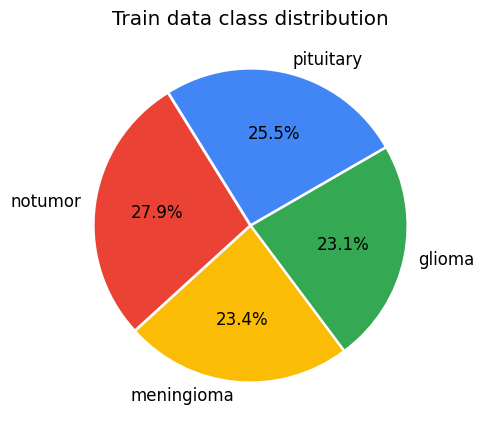

In [ ]:
plt.figure(figsize=(12,5))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 12})
plt.pie([len([y for y in train_df.labels if y=='pituitary']),
         len([y for y in train_df.labels if y=='notumor']),
         len([y for y in train_df.labels if y=='meningioma']),
         len([y for y in train_df.labels if y=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.0125,0.0125,0.0125,0.0125),
        startangle=30)

plt.title('Train data class distribution')
;

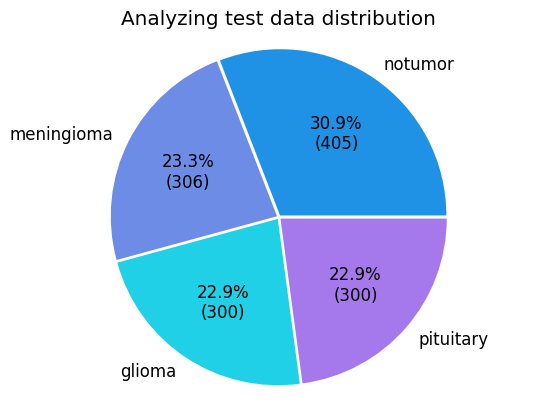

In [ ]:
test_data_bal =test_df.labels.value_counts()
def test_databal(autopct):
    total_bal = sum(test_data_bal)
    value = int(round(autopct *total_bal/100.0))
    return "{:.1f}%\n({:d})".format(autopct, value)

# Analyzing test data distribution
plt.pie(test_data_bal, labels = test_data_bal.index, autopct= test_databal, explode=(0.0125,0.0125,0.0125,0.0125), colors = ["#2092E6","#6D8CE6","#20D0E6","#A579EB"])
plt.title("Analyzing test data distribution")
plt.axis("equal")
plt.show()


In [ ]:
valid_df, test_split_df = train_test_split(test_df,  train_size= 0.5, shuffle= True, random_state= 12)

# Applied Data Augmentation Techniques#


# befor applying augmentation techniques

In [ ]:
# crobed image size
batch_size = 16
img_size = (128, 128)


tr_imdgen = ImageDataGenerator()


ts_imdgen = ImageDataGenerator()

train_gen = tr_imdgen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_imdgen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_imdgen.flow_from_dataframe( test_split_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


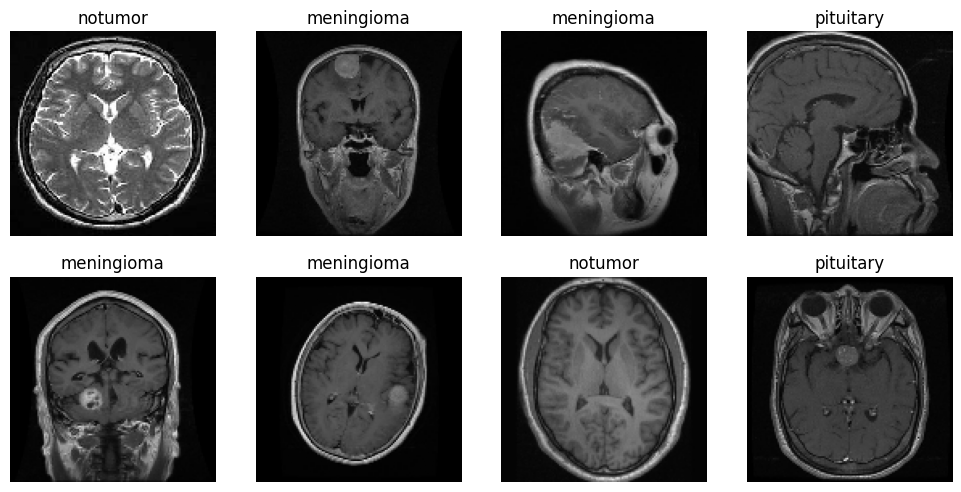

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (10, 10))

for i in range(8):
    plt.subplot(4, 4, i+1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# After applying augmentation techniques #

In [ ]:
batch_size = 16
img_size = (128, 128)

tr_imdgen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


ts_imdgen = ImageDataGenerator(rescale = 1./255)

train_gen = tr_imdgen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_imdgen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_imdgen.flow_from_dataframe( test_split_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


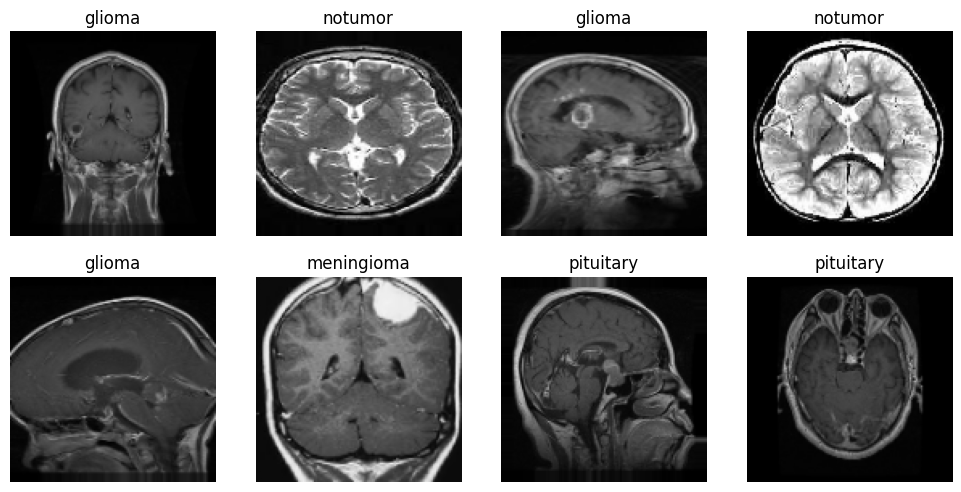

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (10, 10))

for j in range(8):
    plt.subplot(4, 4, j+1)
    image = images[j]
    plt.imshow(image)
    index = np.argmax(labels[j])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Model One implementaion: #
Call the VGG16 base model and Set the last vgg block to trainable

In [ ]:
IMAGE_SIZE=128

vgg16_base_model = VGG16(input_shape=(128,128,3), include_top=False, weights='imagenet')
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# most Important
# Set all layers to non-trainable
for layer in vgg16_base_model.layers:
    layer.trainable = False

# Set the last vgg block to trainable
vgg16_base_model.layers[-2].trainable = True
vgg16_base_model.layers[-3].trainable = True
vgg16_base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(vgg16_base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(class_count, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,908 (60.13 MB)

 Trainable params: 8,128,644 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
vgg16_base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

# Use Adam Optimizer with learing raste 0.0001 and used categorical_crossentropy for loss fuction and accuracy metrics #

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
len(train_df.filepaths)

5712

In [ ]:
batch_size = 20
steps = int(len(train_df.filepaths)/batch_size)
epochs = 10

history = model.fit(train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 53s 139ms/step - accuracy: 0.7075 - loss: 0.7314 - val_accuracy: 0.8931 - val_loss: 0.3332
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.8910 - loss: 0.3089 - val_accuracy: 0.9008 - val_loss: 0.2578
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9178 - loss: 0.2142 - val_accuracy: 0.8977 - val_loss: 0.2832
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9290 - loss: 0.1849 - val_accuracy: 0.9145 - val_loss: 0.2369
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9460 - loss: 0.1463 - val_accuracy: 0.9008 - val_loss: 0.3143
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9593 - loss: 0.1234 - val_accuracy: 0.9405 - val_loss: 0.1811
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.9570 - loss: 0.1108 - val_accuracy: 0.9405 - val_loss: 0.1299
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.9696 - loss: 0.0885 - val

In [ ]:
test_loss, test_accuracy = model.evaluate(test_gen, verbose= 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9340 - loss: 0.2073


In [ ]:
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss :.2f}%')

Test Accuracy: 93.14%
Test loss: 0.20%


In [ ]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("VGG16 Train Loss: ", train_score[0])
print("VGG16 Train Accuracy: ", train_score[1])
print('-' * 50)
print("VGG16 Validation Loss: ", valid_score[0])
print("VGG16 Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("VGG16 Test Loss: ", test_score[0])
print("VGG16 Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.9787 - loss: 0.0626
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9779 - loss: 0.1026
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9693 - loss: 0.0750
VGG16 Train Loss:  0.06288668513298035
VGG16 Train Accuracy:  0.9777660965919495
--------------------------------------------------
VGG16 Validation Loss:  0.10923504084348679
VGG16 Validation Accuracy:  0.970992386341095
--------------------
VGG16 Test Loss:  0.07356569916009903
VGG16 Test Accuracy:  0.9740853905677795


In [ ]:
# Evaluate model on training, validation, and test datasets
datasets = {'Train': train_gen, 'Validation': valid_gen, 'Test': test_gen}
scores = {}

for name, data in datasets.items():
    scores[name] = model.evaluate(data, verbose=1)
    print(f"{name} Loss: {scores[name][0]}")
    print(f"{name} Accuracy: {scores[name][1]}")
    print('-' * 20)

357/357 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.9577 - loss: 0.1073
Train Loss: 0.11571532487869263
Train Accuracy: 0.9558823704719543
--------------------
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9155 - loss: 0.3129
Validation Loss: 0.2575702965259552
Validation Accuracy: 0.9206106662750244
--------------------
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9340 - loss: 0.2073
Test Loss: 0.19856271147727966
Test Accuracy: 0.9314024448394775
--------------------


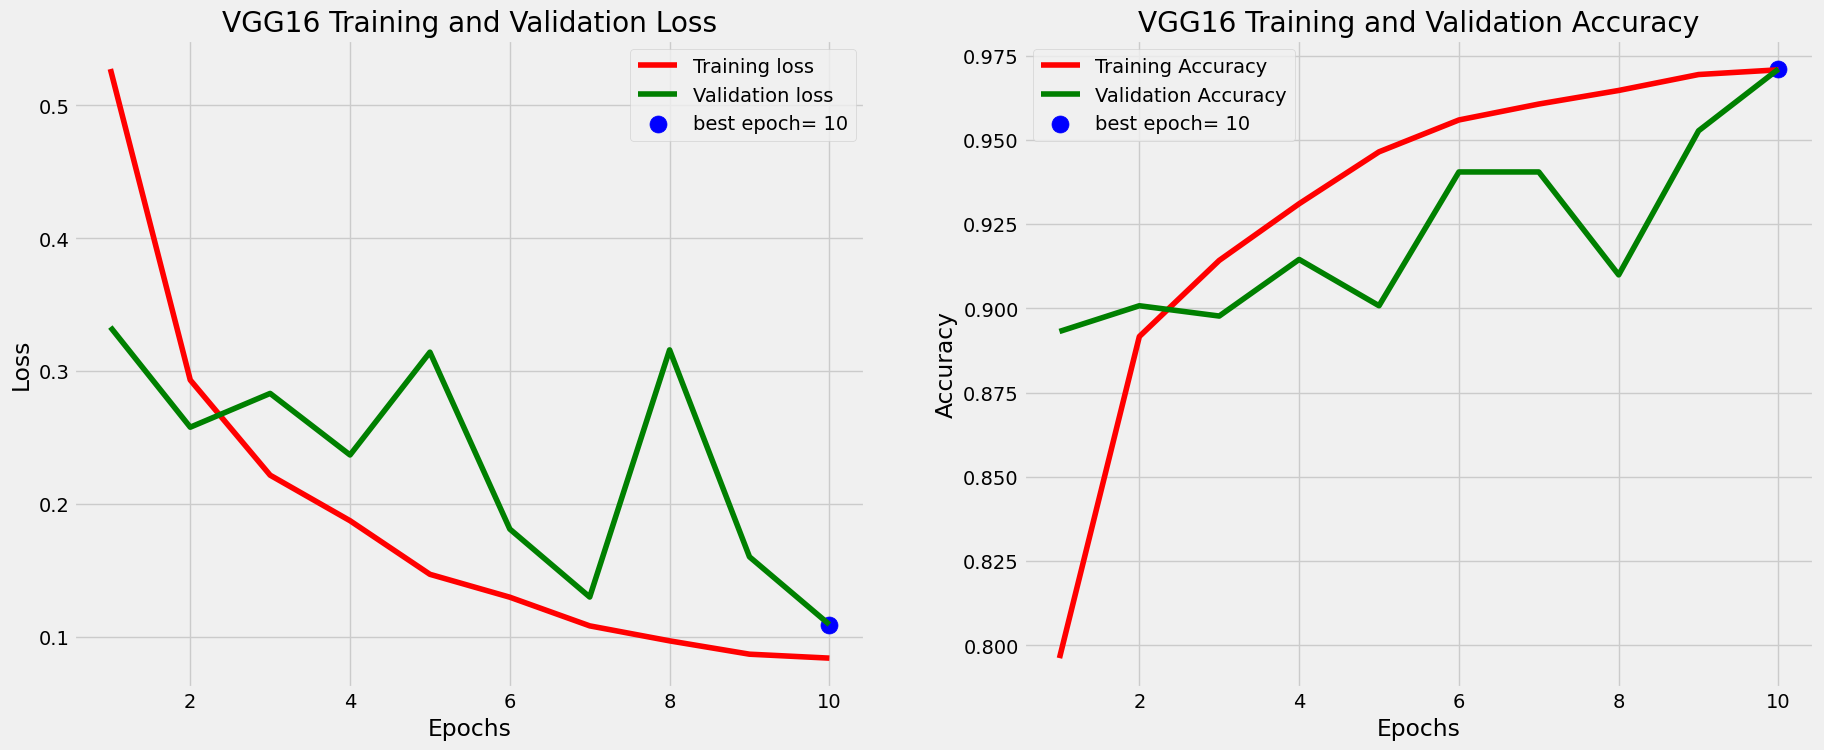

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step


In [ ]:
g_dict = test_gen.class_indices
class_dict = list(g_dict.keys())

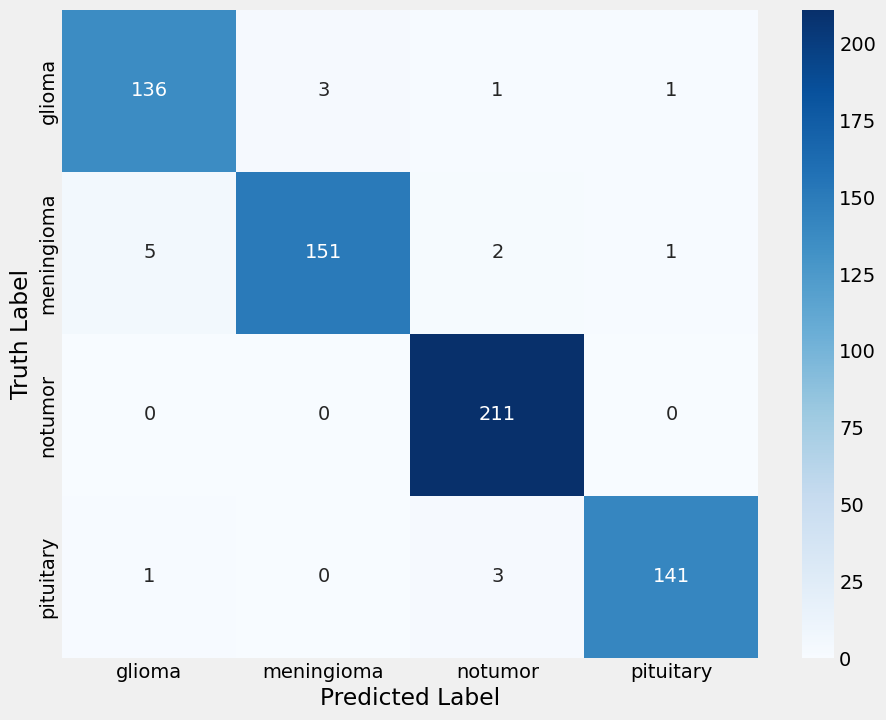

In [ ]:

cm = confusion_matrix(test_gen.classes, y_pred)
labels = list(g_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
classes = list(g_dict.keys())

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.96      0.96      0.96       141
  meningioma       0.98      0.95      0.96       159
     notumor       0.97      1.00      0.99       211
   pituitary       0.99      0.97      0.98       145

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



# To implement ResNet50 trainable modle #

In [ ]:
#Import and initilaze the ResNet50

IMAGE_SIZE = [128, 128]
#resnet50 = ResNet50(input_shape=(128,128,3), include_top=False, weights='imagenet')
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
x_resnet = Flatten()(resnet50.output)

In [ ]:
pred_resnet = Dense(4, activation='softmax')(x_resnet)

# create a model object
resnet50_model = Model(inputs=resnet50.input, outputs=pred_resnet)

In [ ]:
resnet50_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,718,788 (90.48 MB)

 Trainable params: 131,076 (512.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# tell the model what cost and optimization method to use
resnet50_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Data preproceesing and data arumentaion in ResNet50#

In [ ]:
# crobed image size
batch_size = 16
img_size = (128, 128)


tr_rntgen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

ts_rntgen = ImageDataGenerator(rescale = 1./255 )

train_rntgen = tr_rntgen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_rntgen = ts_rntgen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_rntgen = ts_rntgen.flow_from_dataframe( test_split_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
batch_size = 20
steps = int(len(train_df.filepaths)/batch_size)
epochs = 10

resnet50_history = resnet50_model.fit(train_rntgen, epochs= epochs, verbose= 1, validation_data= valid_rntgen, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 4053s 11s/step - accuracy: 0.4839 - loss: 1.1655 - val_accuracy: 0.6412 - val_loss: 0.9446
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.6524 - loss: 0.8563 - val_accuracy: 0.6626 - val_loss: 0.8781
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.6744 - loss: 0.7932 - val_accuracy: 0.6733 - val_loss: 0.8739
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.6981 - loss: 0.7552 - val_accuracy: 0.6962 - val_loss: 0.7931
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.7095 - loss: 0.7092 - val_accuracy: 0.6977 - val_loss: 0.8257
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.7098 - loss: 0.7152 - val_accuracy: 0.6824 - val_loss: 0.8022
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 38s 107ms/step - accuracy: 0.7246 - loss: 0.6861 - val_accuracy: 0.7313 - val_loss: 0.7083
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.7179 - loss: 0.6711 - val

In [ ]:
train_score = resnet50_model.evaluate(train_rntgen, verbose= 1)
valid_score = resnet50_model.evaluate(valid_rntgen, verbose= 1)
test_score = resnet50_model.evaluate(test_rntgen, verbose= 1)

print("Resnet50 Train Loss: ", train_score[0])
print("Resnet50 Train Accuracy: ", train_score[1])
print('-' * 50)
print("Resnet50 Validation Loss: ", valid_score[0])
print("Resnet50 Validation Accuracy: ", valid_score[1])
print('-' * 50)
print("Resnet50 Test Loss: ", test_score[0])
print("Resnet50 Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.7490 - loss: 0.6127
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7020 - loss: 0.7859
41/41 ━━━━━━━━━━━━━━━━━━━━ 397s 10s/step - accuracy: 0.7080 - loss: 0.7350
Resnet50 Train Loss:  0.6033474802970886
Resnet50 Train Accuracy:  0.7550770044326782
--------------------------------------------------
Resnet50 Validation Loss:  0.7186587452888489
Resnet50 Validation Accuracy:  0.7251908183097839
--------------------------------------------------
Resnet50 Test Loss:  0.7104836106300354
Resnet50 Test Accuracy:  0.7256097793579102


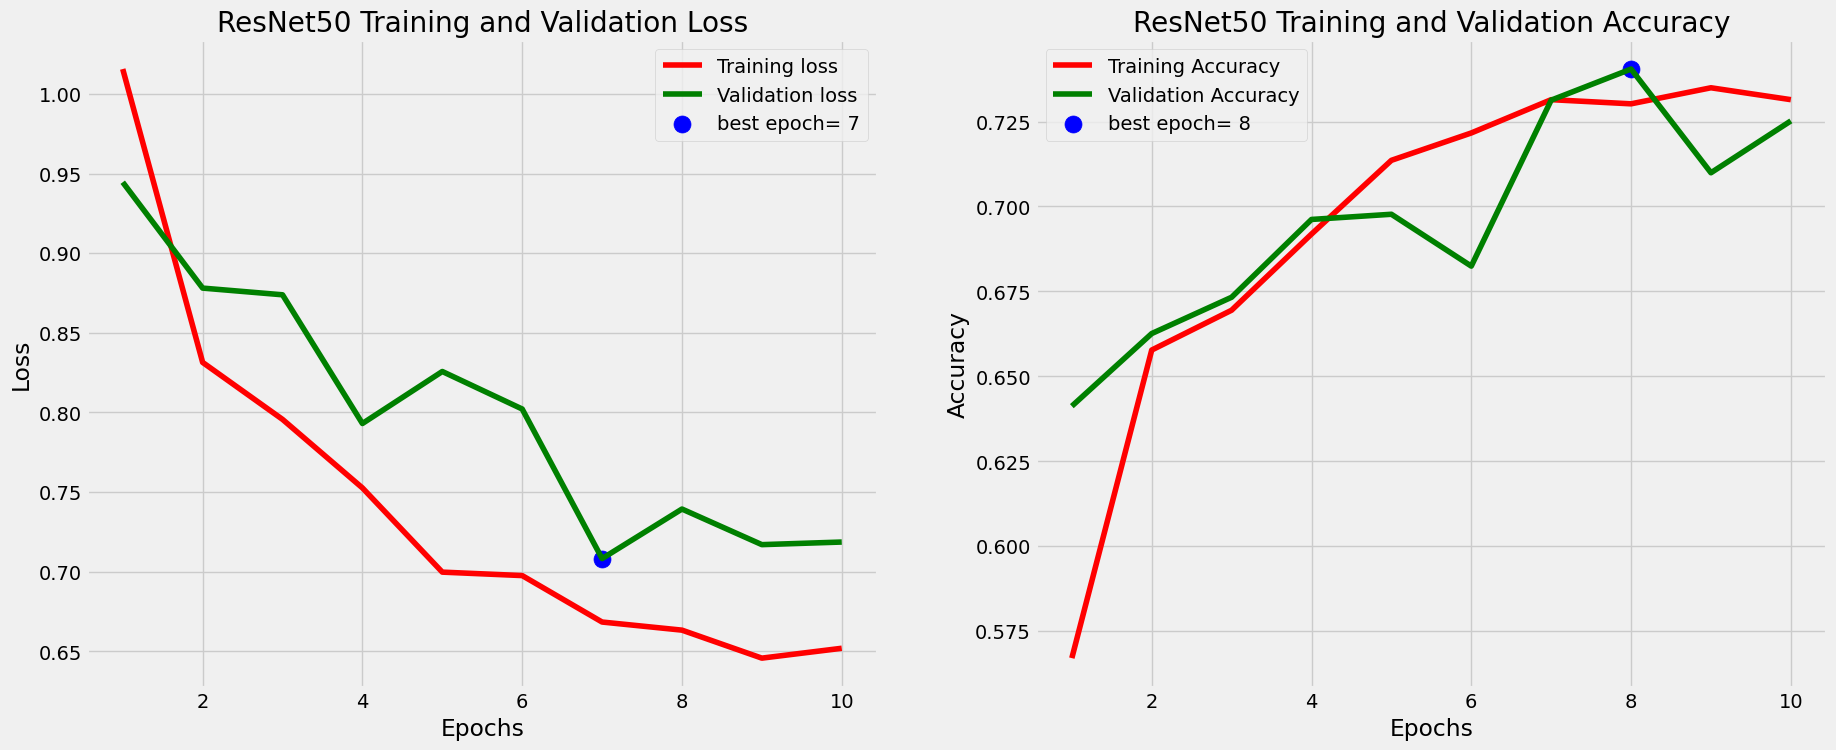

In [ ]:
tr_acc = resnet50_history.history['accuracy']
tr_loss = resnet50_history.history['loss']
val_acc = resnet50_history.history['val_accuracy']
val_loss = resnet50_history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history of ResNet50
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:

preds = resnet50_model.predict(test_rntgen)
y_pred = np.argmax(preds, axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step


In [ ]:
g_dict = test_rntgen.class_indices
class_dict = list(g_dict.keys())


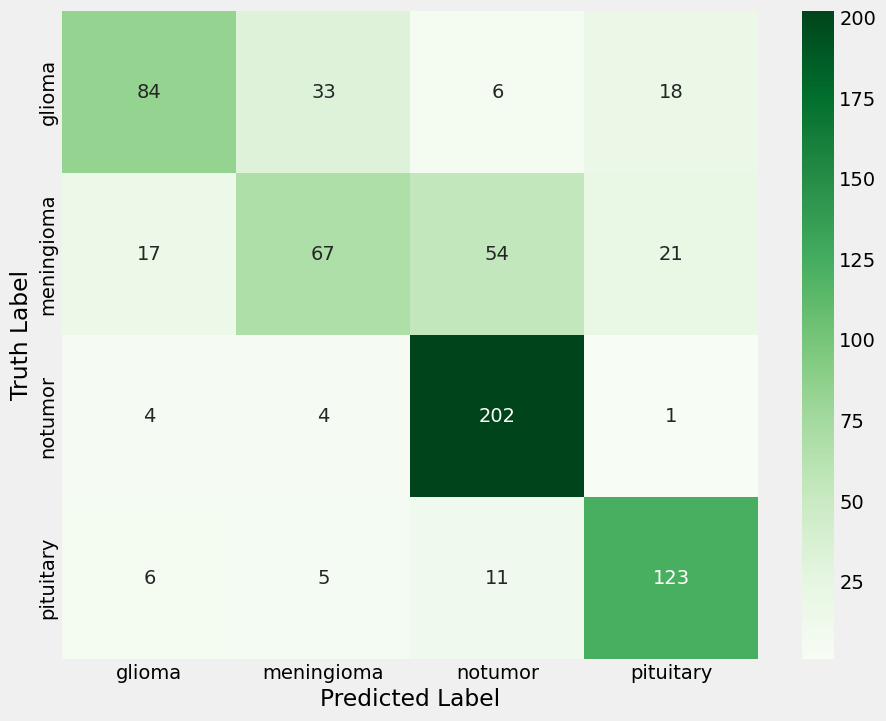

In [ ]:
cm = confusion_matrix(test_rntgen.classes, y_pred)
labels = list(g_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [ ]:
g_dict = test_rntgen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())

In [ ]:
g_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [ ]:
print(classification_report(test_rntgen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.76      0.60      0.67       141
  meningioma       0.61      0.42      0.50       159
     notumor       0.74      0.96      0.83       211
   pituitary       0.75      0.85      0.80       145

    accuracy                           0.73       656
   macro avg       0.72      0.71      0.70       656
weighted avg       0.72      0.73      0.71       656



#Model 3 : Build Convolutional Neural Network (CNN) from Scratch#

In [ ]:
batch_size = 16
img_size = (128, 128)


tr_cnnIgen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

ts_cnnIgen = ImageDataGenerator(rescale = 1./255 )

train_cnnIgen = tr_cnnIgen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_cnnIgen = ts_cnnIgen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_cnnIgen = ts_cnnIgen.flow_from_dataframe( test_split_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create CNN Model Structure
IMAGE_SIZE = 128
#channels = 3
#img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_cnnIgen.class_indices.keys())) # to define number of classes in dense layer

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), padding="same",activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(32, (3, 3),activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(16, activation='relu'))
cnn_model.add(Dense(class_count, activation='softmax'))
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

###########################################################################


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │         460,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 498,740 (1.90 MB)

 Trainable params: 498,740 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 16
img_size = (128, 128)


tr_cnnIgen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

ts_cnnIgen = ImageDataGenerator(rescale = 1./255 )

train_cnnIgen = tr_cnnIgen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_cnnIgen = ts_cnnIgen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_cnnIgen = ts_cnnIgen.flow_from_dataframe( test_split_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
train_cnnIgen.image_shape

(128, 128, 3)

In [ ]:
epochs = 10   # number of all epochs in training

cnn_history = cnn_model.fit(train_cnnIgen, epochs= epochs, verbose= 1, validation_data= valid_cnnIgen, shuffle= False)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.5707 - loss: 0.9572 - val_accuracy: 0.7557 - val_loss: 0.6216
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.7649 - loss: 0.5956 - val_accuracy: 0.7695 - val_loss: 0.6008
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.8052 - loss: 0.5113 - val_accuracy: 0.7847 - val_loss: 0.5401
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.8263 - loss: 0.4438 - val_accuracy: 0.7756 - val_loss: 0.5660
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.8558 - loss: 0.3830 - val_accuracy: 0.7771 - val_loss: 0.5592
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.8774 - loss: 0.3220 - val_accuracy: 0.8489 - val_loss: 0.3660
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 103ms/step - accuracy: 0.8864 - loss: 0.3071 - val_accuracy: 0.8275 - val_loss: 0.3959
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.8845 - loss: 0.2830 - val

In [ ]:
train_score = cnn_model.evaluate(train_cnnIgen, verbose= 1)
valid_score = cnn_model.evaluate(valid_cnnIgen, verbose= 1)
test_score = cnn_model.evaluate(test_cnnIgen, verbose= 1)

print("CNN Train Loss: ", train_score[0])
print("CNN Train Accuracy: ", train_score[1])
print('-' * 20)
print("CNN Validation Loss: ", valid_score[0])
print("CNN Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("CNN Test Loss: ", test_score[0])
print("CNN Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.9160 - loss: 0.2138
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8514 - loss: 0.3025
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8412 - loss: 0.3341
CNN Train Loss:  0.2201826125383377
CNN Train Accuracy:  0.9173669219017029
--------------------
CNN Validation Loss:  0.32572588324546814
CNN Validation Accuracy:  0.8595420122146606
--------------------
CNN Test Loss:  0.3163650929927826
CNN Test Accuracy:  0.8506097793579102


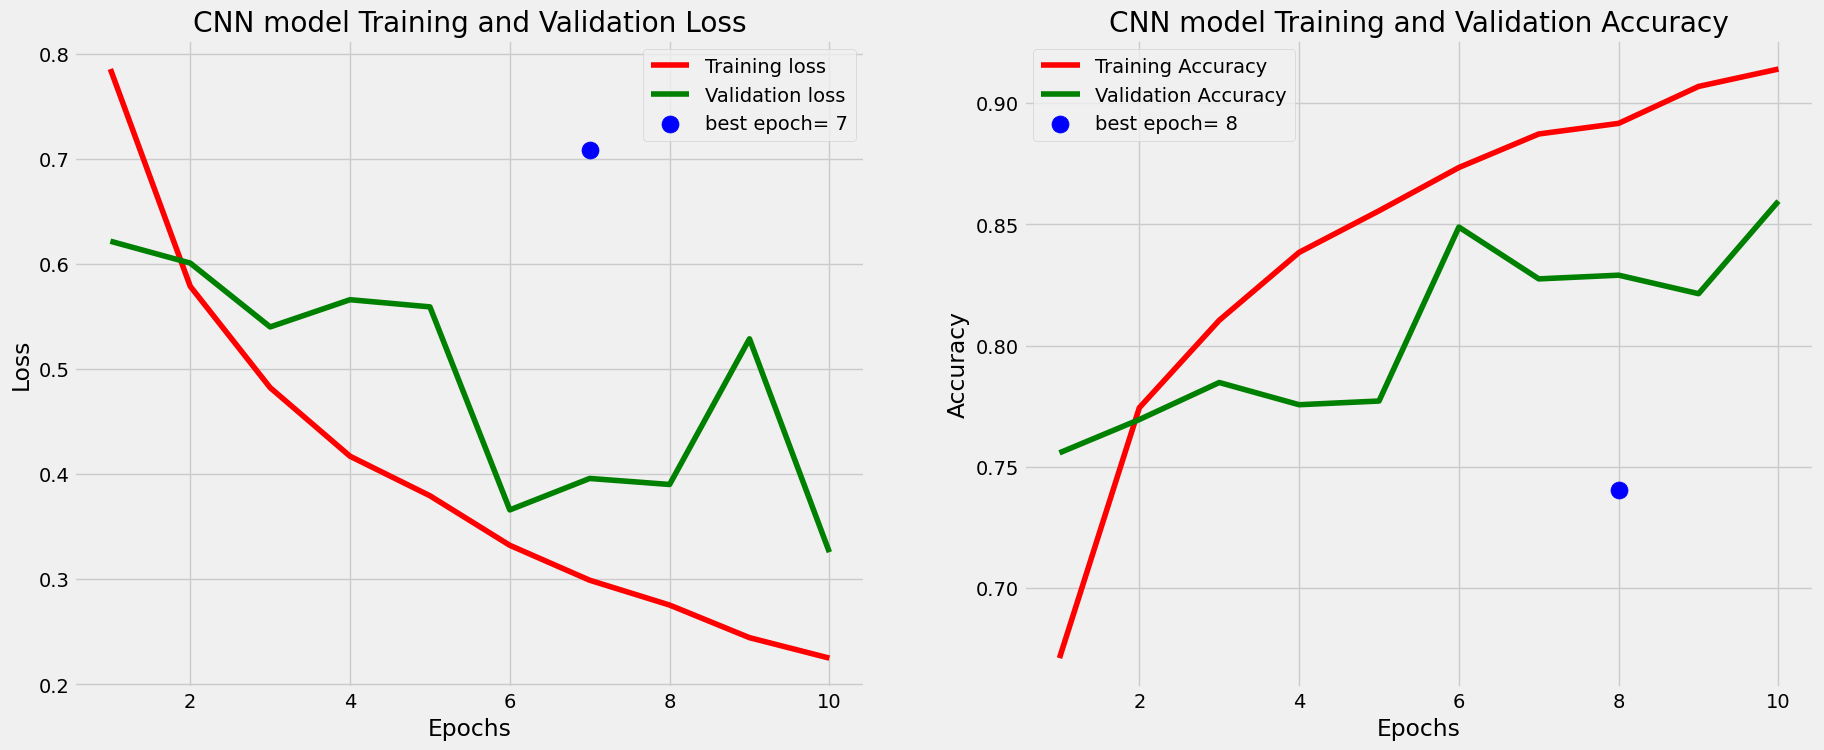

In [ ]:
# Define needed variables
tr_acc_cnn = cnn_history.history['accuracy']
tr_loss_cnn = cnn_history.history['loss']
val_acc_cnn = cnn_history.history['val_accuracy']
val_loss_cnn = cnn_history.history['val_loss']
index_loss_cnn = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc_cnn))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss_cnn, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss_cnn, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('CNN model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc_cnn, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc_cnn, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('CNN model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
preds = cnn_model.predict(test_cnnIgen)
y_pred = np.argmax(preds, axis=1)

g_dict = test_cnnIgen.class_indices
class_dict = list(g_dict.keys())

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


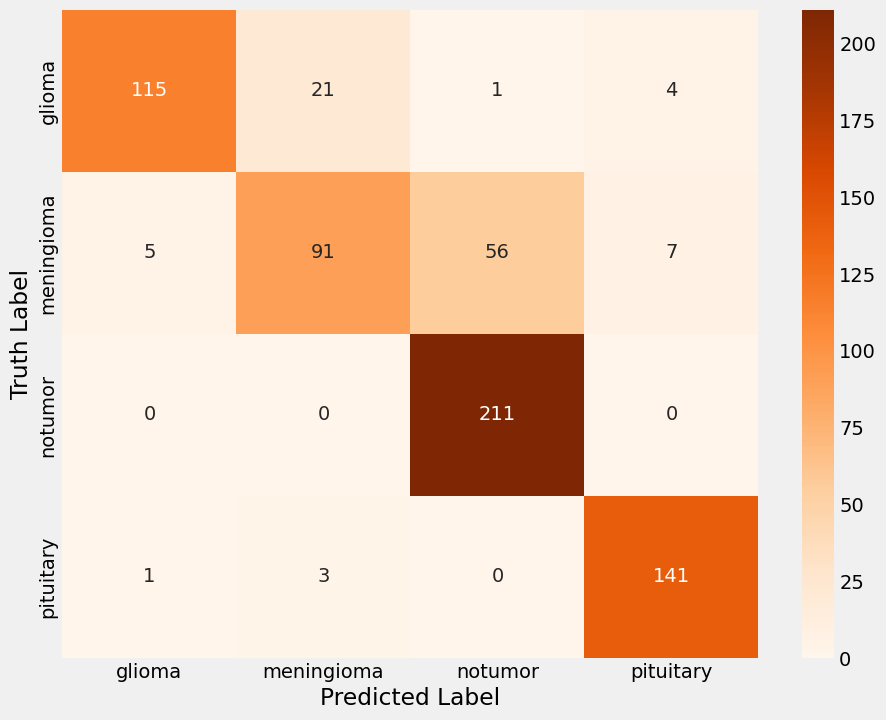

In [ ]:
cm = confusion_matrix(test_rntgen.classes, y_pred)
labels = list(g_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()


In [ ]:
g_dict = test_cnnIgen.class_indices
classes = list(g_dict.keys())

In [ ]:
print(classification_report(test_cnnIgen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.95      0.82      0.88       141
  meningioma       0.79      0.57      0.66       159
     notumor       0.79      1.00      0.88       211
   pituitary       0.93      0.97      0.95       145

    accuracy                           0.85       656
   macro avg       0.86      0.84      0.84       656
weighted avg       0.85      0.85      0.84       656

